In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Keys of Iris Dataset: \n{}".format(iris_dataset.keys()))

Keys of Iris Dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
print("Target name :{}".format(iris_dataset['target_names']))
print("Feature name :{}".format(iris_dataset['feature_names']))

Target name :['setosa' 'versicolor' 'virginica']
Feature name :['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [23]:
print("Type of data :{}".format(type(iris_dataset['data'])))
print("Shape of data :" ,iris_dataset['data'].shape)
print("First five row of data :\n" ,iris_dataset['data'][:5],"\n")

Type of data :<class 'numpy.ndarray'>
Shape of data : (150, 4)
First five row of data :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 



In [24]:
print("Type of target :{}".format(type(iris_dataset['target'])))
## Target is one dimensional array
print("Shape of target :" ,iris_dataset['target'].shape)
print("Target :\n" ,iris_dataset['target'],"\n")

Type of target :<class 'numpy.ndarray'>
Shape of target : (150,)
Target :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 



In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'] , iris_dataset['target'] , random_state=0)

In [26]:
print("X_train shape : {}".format(X_train.shape))
print("y_train shape : {}".format(y_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_test shape : {}".format(y_test.shape))

X_train shape : (112, 4)
y_train shape : (112,)
X_test shape : (38, 4)
y_test shape : (38,)


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

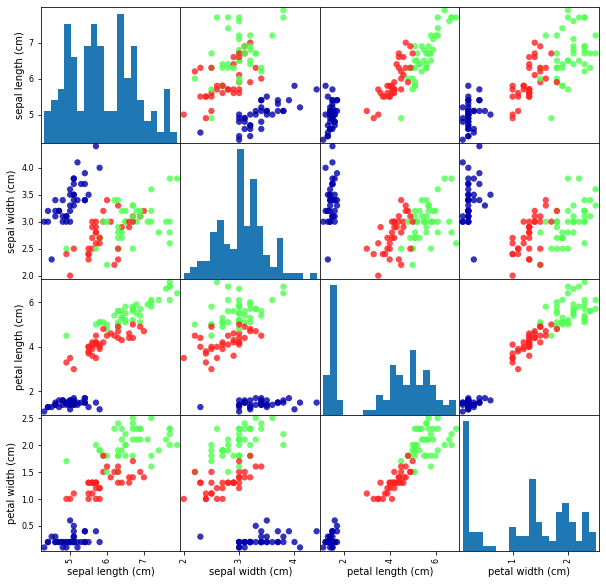

In [44]:
## dataframe of X_train for pair plot
iris_dataframe = pd.DataFrame(X_train , columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10,10), marker='o', hist_kwds={'bins':20}, s=40, alpha=.8, cmap=mglearn.cm3)

<h2>K-Nearest Neighbours</h2>

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
X_new = np.array([[5,2.9,1,0.2]])
print("Shape of X_new : {}".format(X_new.shape))

Shape of X_new : (1, 4)


In [51]:
prediction = knn.predict(X_new)
print("Prediction :{}".format(prediction))
print("Prediction target name:{}".format(iris_dataset['target_names'][prediction]))

Prediction :[0]
Prediction target name:['setosa']


In [55]:
y_pred = knn.predict(X_test)
#print(" : {}".format())
print("Test set prdictions :\n{}".format(y_pred))

Test set prdictions :
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [57]:
print("Test set score : {:.2f}".format(np.mean(y_pred==y_test)))
print("Test set score : {:.2f}".format(knn.score(X_test,y_test)))

Test set score : 0.97
Test set score : 0.97
